In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
X = df.iloc[:,[2,4,5]]
y = df.Survived

In [4]:
print(f"A entrada X possui missing? {X.isnull().values.any()}")
print(f"Quantos? {X.isnull().sum().sum()}")
print(f"Quais colunas possuem missing? \n {X.isnull().sum()}")

A entrada X possui missing? True
Quantos? 177
Quais colunas possuem missing? 
 Pclass      0
Sex         0
Age       177
dtype: int64


In [5]:
df = df.dropna(subset=['Age'])
df = df.reset_index(drop=True)

In [6]:
X = df.iloc[:,[2,4,5]].values
y = df.Survived.values

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,1] = le.fit_transform(X[:,1])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(571, 3)
(143, 3)
(571,)
(143,)


In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
##====================================================================##

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [12]:
y_pred = model.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[68 11]
 [11 53]]


0.8461538461538461

In [14]:
def pred_and_evalue(X_test, y_test, model):

    y_pred = model.predict(X_test)

    # Acc
    from sklearn.metrics import accuracy_score
    acuracia = accuracy_score(y_test, y_pred)
    print('Acurácia:', acuracia)

    # Kappa
    from sklearn.metrics import cohen_kappa_score
    k = cohen_kappa_score(y_test, y_pred)
    print('Kappa:', k)

    # F1
    from sklearn.metrics import f1_score
    f1 = f1_score(y_test, y_pred)
    print('F1:', f1)

    # Matriz Confusão
    from sklearn.metrics import confusion_matrix
    confMatrix = confusion_matrix(y_test, y_pred)
    
    ax = plt.subplot()
    sns.heatmap(confMatrix, annot=True, fmt=".0f")
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.title('Matriz Confusão')

    ## Colocar nomes
    ax.xaxis.set_ticklabels(['Sobreviveu', 'Morreu'])
    ax.yaxis.set_ticklabels(['Sobreviveu', 'Morreu'])
    plt.show()

Classificação: Regressão Logística:
Acurácia: 0.8461538461538461
Kappa: 0.688884493670886
F1: 0.828125


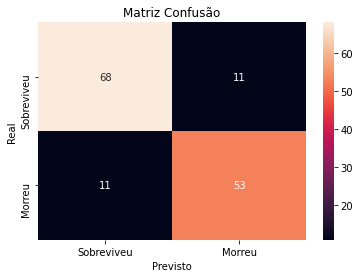

In [15]:
print('Classificação: Regressão Logística:')
pred_and_evalue(X_test, y_test, model)

In [16]:
##====================================================================##

In [17]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)


KNeighborsClassifier()

Classificação: KNN
Acurácia: 0.8041958041958042
Kappa: 0.6004789463181002
F1: 0.7704918032786885


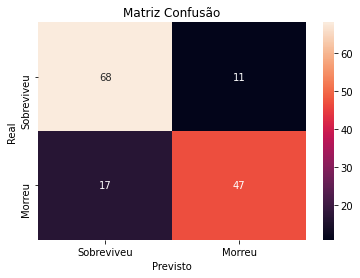

In [18]:
print('Classificação: KNN')
pred_and_evalue(X_test, y_test, model)

In [19]:
##====================================================================##

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# Parâmetros a serem testados
tuned_parameters = [{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]}]
print("# Tuning hyper-parâmetros parar F1 score")
print()
model = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring='f1')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print()

# Tuning hyper-parâmetros parar F1 score

              precision    recall  f1-score   support

           0       0.79      0.75      0.77        79
           1       0.71      0.75      0.73        64

    accuracy                           0.75       143
   macro avg       0.75      0.75      0.75       143
weighted avg       0.75      0.75      0.75       143




Classificação: KNN com GridSearch
Acurácia: 0.7482517482517482
Kappa: 0.493904836806921
F1: 0.7272727272727272


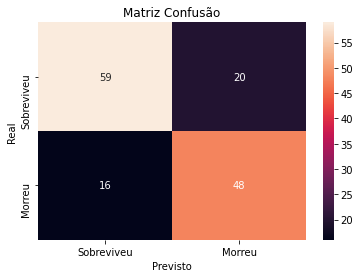

In [21]:
print('Classificação: KNN com GridSearch')
pred_and_evalue(X_test,y_test,model)

In [22]:
##====================================================================##

In [23]:
from sklearn.svm import SVC

model = SVC(random_state=0)
model.fit(X_train, y_train)

SVC(random_state=0)

Classificação: SVM
Acurácia: 0.7762237762237763
Kappa: 0.5307629204265791
F1: 0.6923076923076923


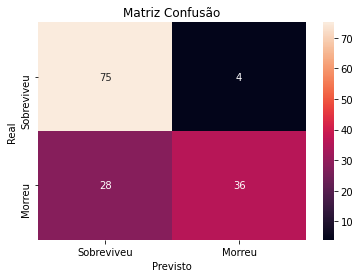

In [24]:
print('Classificação: SVM')
pred_and_evalue(X_test, y_test, model)

In [25]:
##====================================================================##

In [26]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(min_samples_leaf=5, random_state=0, criterion='gini')
model.fit(X_train, y_train)


DecisionTreeClassifier(min_samples_leaf=5, random_state=0)

[Text(436.4264018691589, 520.95, 'X[1] <= -0.298\ngini = 0.478\nsamples = 571\nvalue = [345, 226]\nclass = Não Sobreviveu'),
 Text(234.6728971962617, 475.65000000000003, 'X[0] <= 0.286\ngini = 0.385\nsamples = 204\nvalue = [53, 151]\nclass = Sobreviveu'),
 Text(114.72897196261682, 430.35, 'X[0] <= -0.92\ngini = 0.08\nsamples = 120\nvalue = [5, 115]\nclass = Sobreviveu'),
 Text(62.579439252336456, 385.05, 'X[2] <= -0.283\ngini = 0.03\nsamples = 65\nvalue = [1, 64]\nclass = Sobreviveu'),
 Text(41.7196261682243, 339.75, 'X[2] <= -0.421\ngini = 0.083\nsamples = 23\nvalue = [1, 22]\nclass = Sobreviveu'),
 Text(20.85981308411215, 294.45, 'gini = 0.0\nsamples = 18\nvalue = [0, 18]\nclass = Sobreviveu'),
 Text(62.579439252336456, 294.45, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = Sobreviveu'),
 Text(83.4392523364486, 339.75, 'gini = 0.0\nsamples = 42\nvalue = [0, 42]\nclass = Sobreviveu'),
 Text(166.8785046728972, 385.05, 'X[2] <= 0.51\ngini = 0.135\nsamples = 55\nvalue = [4, 51]\nclas

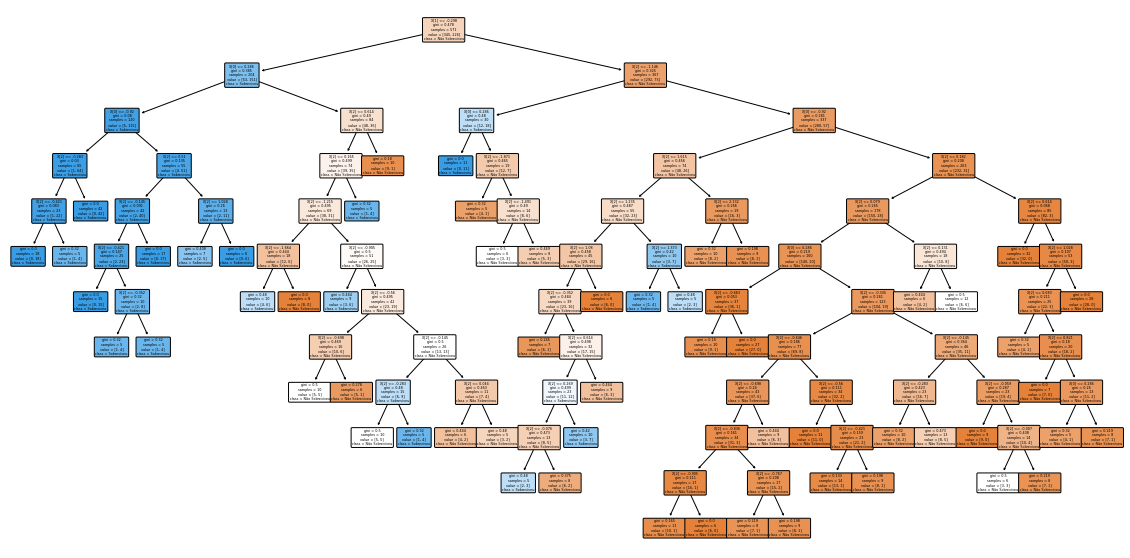

In [27]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(20,10))
tree.plot_tree(model, class_names=['Não Sobreviveu', 'Sobreviveu'],filled=True, rounded=True)


Classificação: Árvore de Decisão (Gini)
Acurácia: 0.8461538461538461
Kappa: 0.6879587383455663
F1: 0.8253968253968254


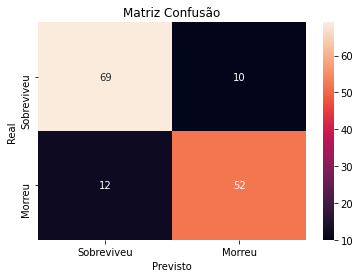

In [28]:
print('Classificação: Árvore de Decisão (Gini)')
pred_and_evalue(X_test, y_test, model)

In [29]:
##====================================================================##

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# Set the parameters by cross-validation
tuned_parameters = [{'criterion': ['gini', 'entropy'], 'max_depth': [2,4,6,8,10,12],
                     'min_samples_leaf': [1, 2, 3, 4, 5, 8, 10]}]

print("# Tuning hyper-parameters for F1 score")
print()

model = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1')
model.fit(X_train, y_train)

y_true, y_pred = y_test, model.predict(X_test)
print(classification_report(y_true, y_pred))
print()

# Tuning hyper-parameters for F1 score

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        79
           1       0.81      0.73      0.77        64

    accuracy                           0.80       143
   macro avg       0.81      0.80      0.80       143
weighted avg       0.80      0.80      0.80       143




Classificação: GridSearch Árvore de Decisão (Gini)
Acurácia: 0.8041958041958042
Kappa: 0.6004789463181002
F1: 0.7704918032786885


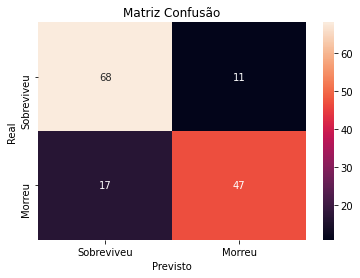

In [31]:
print('Classificação: GridSearch Árvore de Decisão (Gini)')
pred_and_evalue(X_test, y_test, model)

In [32]:
print('Melhores Parâmetros:', model.best_params_)

Melhores Parâmetros: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2}


6923076923077, 469.4727272727273, 'X[0] <= 0.286\nentropy = 0.826\nsamples = 204\nvalue = [53, 151]\nclass = Sobreviveu'),
 Text(67.45054945054946, 420.05454545454546, 'X[2] <= -0.421\nentropy = 0.25\nsamples = 120\nvalue = [5, 115]\nclass = Sobreviveu'),
 Text(55.18681318681319, 370.6363636363636, 'entropy = 0.0\nsamples = 33\nvalue = [0, 33]\nclass = Sobreviveu'),
 Text(79.71428571428572, 370.6363636363636, 'X[2] <= -0.145\nentropy = 0.317\nsamples = 87\nvalue = [5, 82]\nclass = Sobreviveu'),
 Text(49.05494505494506, 321.21818181818185, 'X[2] <= -0.352\nentropy = 0.696\nsamples = 16\nvalue = [3, 13]\nclass = Sobreviveu'),
 Text(24.52747252747253, 271.8, 'X[0] <= -0.92\nentropy = 0.503\nsamples = 9\nvalue = [1, 8]\nclass = Sobreviveu'),
 Text(12.263736263736265, 222.38181818181818, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Sobreviveu'),
 Text(36.791208791208796, 222.38181818181818, 'entropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = Sobreviveu'),
 Text(73.58241758241759,

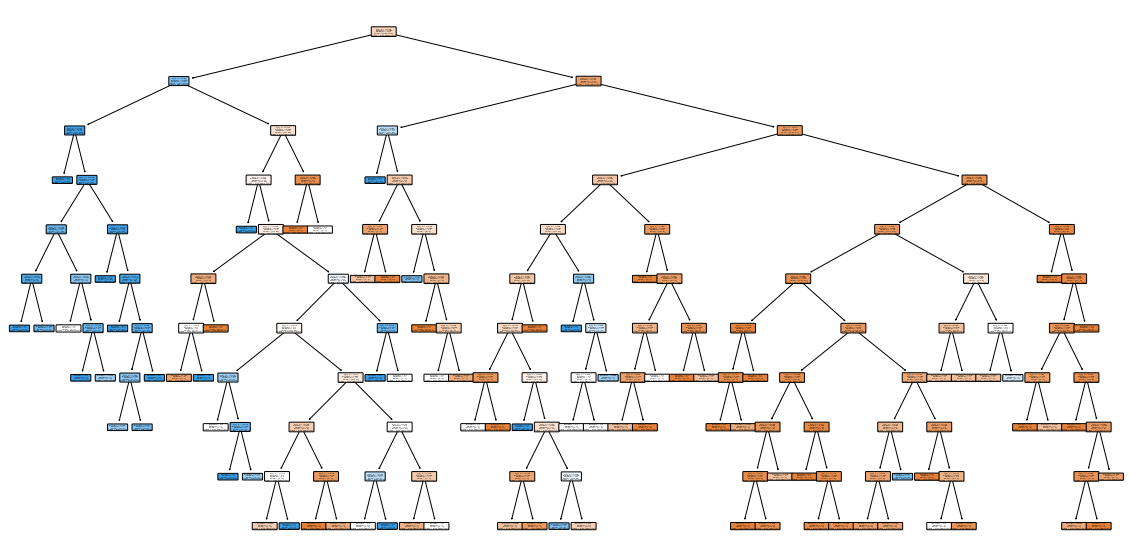

In [33]:
fig, ax = plt.subplots(figsize=(20, 10)) # Definir tamanho da imagem a ser gerada
tree.plot_tree(model.best_estimator_, class_names=['Não Sobreviveu', 'Sobreviveu'], 
               filled=True, rounded=True) ##, feature_names=data.columns); Ajustar para incluir esse parâmetro
##====================================================================##

In [34]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(min_samples_leaf=5, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=5, random_state=0)

Classificação: Random Forest
Acurácia: 0.7902097902097902
Kappa: 0.5770065075921909
F1: 0.7692307692307692


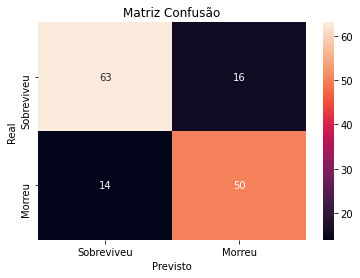

In [35]:
print('Classificação: Random Forest')
pred_and_evalue(X_test, y_test, model)
